## Customer Churn Prediction Using Artificial Neural Networks

In [148]:
# importing depndencies
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

In [126]:
data = pd.read_csv("dataset/customer_churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [127]:
data = data.drop("customerID", axis=1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [128]:
data.shape

(7043, 20)

In [129]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [131]:
data["TotalCharges"].value_counts()

TotalCharges
           11
20.2       11
19.75       9
20.05       8
19.9        8
           ..
130.15      1
3211.9      1
7843.55     1
2196.3      1
197.4       1
Name: count, Length: 6531, dtype: int64

In [132]:
data["TotalCharges"].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [133]:
data[pd.to_numeric(data["TotalCharges"], errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [134]:
data = data[data.TotalCharges != ' ']
data.shape

(7032, 20)

In [135]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"])
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [136]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [137]:
# tenure churns
no_ten_churn = data[data.Churn == "No"].tenure
ten_churn = data[data.Churn == "Yes"].tenure
ten_churn

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

In [138]:
no_ten_churn

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

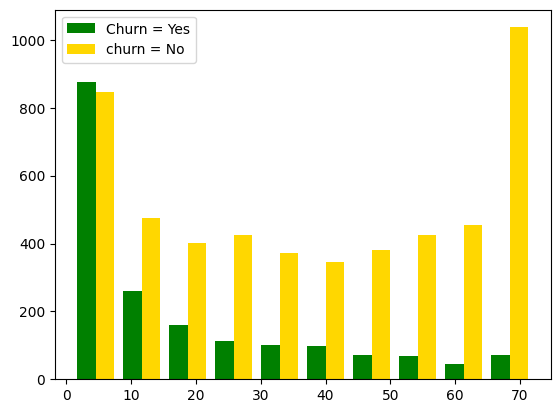

In [150]:
plt.hist(
    [ten_churn, no_ten_churn],
    color=["green", "gold"],
    label=["Churn = Yes", "churn = No"]
)
plt.legend()

In [140]:
# encoding categorical variables
def print_cat_vars(data):
    for column in data:
        if data[column].dtypes == "object":
            print(f"{column} : {data[column].unique()}")

In [141]:
print_cat_vars(data)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [142]:
data = data.replace("No internet service", "No")
data = data.replace("No phone service", "No")

In [143]:
print_cat_vars(data)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [144]:
# encoding columns with yes or np
yes_no_columns = [
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "PaperlessBilling",
    "Churn"
]

for col in yes_no_columns:
    data[col].replace(
        {"Yes" : 1, "No": 0},
        inplace=True
    )

/tmp/ipykernel_14676/4230362861.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace(
/tmp/ipykernel_14676/4230362861.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col].replace(


In [145]:
# encoding male and female
data["gender"].replace(
    {"Male": 1, "Female": 0},
    inplace=True
)
data["gender"].value_counts()

/tmp/ipykernel_14676/1022046660.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["gender"].replace(
/tmp/ipykernel_14676/1022046660.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["gender"].replace(


gender
1    3549
0    3483
Name: count, dtype: int64

In [146]:
# encoding  internet service, contract, payment methods
data = pd.get_dummies(
    data=data,
    columns=["InternetService", "Contract", "PaymentMethod"],
    dtype=int
)

In [147]:
data.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4965,0,0,0,0,6,0,0,0,0,1,0,1,1,1,47.95,305.10,1,1,0,0,1,0,0,0,0,1,0
6218,0,0,1,1,70,0,0,0,1,1,1,1,1,1,58.40,4113.15,0,1,0,0,0,1,0,1,0,0,0
4490,0,1,1,0,54,1,1,1,1,1,1,1,1,1,115.60,6431.05,0,0,1,0,0,1,0,1,0,0,0
1608,1,0,0,0,17,1,0,0,0,0,0,0,0,1,20.10,279.50,0,0,0,1,0,1,0,0,0,0,1
1686,0,0,1,1,26,1,1,0,1,0,1,0,0,1,60.05,1616.15,1,1,0,0,1,0,0,0,0,1,0
2729,0,0,0,0,2,1,1,0,0,0,0,0,1,1,85.70,169.80,1,0,1,0,1,0,0,0,0,1,0
4150,1,1,1,0,7,1,0,0,0,0,0,1,1,1,89.00,605.45,0,0,1,0,1,0,0,0,0,1,0
6662,0,0,0,0,47,0,0,1,1,0,1,0,0,0,39.65,1798.65,0,1,0,0,0,1,0,0,1,0,0
1298,0,0,1,1,24,0,0,1,1,1,0,1,1,0,57.60,1367.75,0,1,0,0,0,1,0,0,0,1,0
4732,0,0,1,1,71,1,0,0,0,0,0,0,0,0,19.90,1397.30,0,0,0,1,0,0,1,0,1,0,0


In [151]:
# scaling tenure, monthly charges and total charges
scale_columns = [
    "tenure",
    "MonthlyCharges",
    "TotalCharges"
]
scaler = MinMaxScaler()
data[scale_columns]= scaler.fit_transform(data[scale_columns])
data.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1086,0,1,0,0,0.140845,1,0,0,0,0,0,1,1,0,0.710945,0.118728,1,0,1,0,1,0,0,1,0,0,0
758,0,0,0,1,0.197183,1,0,0,1,0,0,0,1,1,0.673134,0.144328,1,0,1,0,1,0,0,1,0,0,0
5605,1,0,1,1,0.126761,1,0,0,0,1,0,1,0,0,0.417413,0.062855,0,1,0,0,1,0,0,0,0,0,1
4896,1,0,0,0,0.323944,1,0,0,0,1,0,0,0,1,0.312935,0.132587,0,1,0,0,1,0,0,0,0,0,1
2643,0,0,0,0,0.450704,1,1,0,0,0,0,0,1,1,0.647761,0.316069,1,0,1,0,1,0,0,0,0,1,0
5907,1,0,0,0,0.000000,1,0,0,0,0,0,0,0,1,0.259204,0.002943,0,1,0,0,1,0,0,0,0,0,1
5604,1,0,0,0,0.225352,1,0,0,0,0,0,0,0,1,0.522886,0.137111,0,0,1,0,1,0,0,0,0,1,0
2274,1,0,1,1,0.309859,1,0,1,0,0,1,1,1,1,0.811940,0.266847,1,0,1,0,1,0,0,0,0,1,0
6099,0,0,1,1,0.985915,1,1,0,0,0,0,0,0,0,0.064179,0.206756,0,0,0,1,0,0,1,1,0,0,0
3304,1,1,1,0,0.957746,1,1,0,1,1,1,1,1,1,0.912438,0.878773,0,0,1,0,0,0,1,0,0,1,0


In [ ]:
# building the artificial neural network